In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

loading datasts

In [25]:
content = pd.read_csv(r'C:\Users\Pratiksha Singh\Desktop\real project dataanaly/Content.csv')
reactions = pd.read_csv(r'C:\Users\Pratiksha Singh\Desktop\real project dataanaly/Reactions.csv')
reaction_types = pd.read_csv(r'C:\Users\Pratiksha Singh\Desktop\real project dataanaly/ReactionTypes.csv')

In [26]:
content.columns


Index(['Unnamed: 0', 'Content ID', ' ContentType', 'Category'], dtype='object')

In [30]:
reactions.columns

Index(['Unnamed: 0', 'Content ID', 'Type', 'Datetime'], dtype='object')

In [29]:
reaction_types.columns

Index(['Unnamed: 0', 'Type', 'Sentiment', 'Score'], dtype='object')

In [31]:
# Merging of columns
reactions = reactions.merge(content[["Content ID",'Category']], left_on="Content ID", right_on="Content ID", how='inner')

In [32]:
reactions.head(3)

,Unnamed: 0,Content ID,Type,Datetime,Category
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17 June 2021,Studying
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18 April 2021,Studying


In [33]:
reactions = reactions.merge(reactiontypes[["Type",'Score']], left_on="Type", right_on="Type", how="inner")

In [34]:
reactions.head(3)

,Unnamed: 0,Content ID,Type,Datetime,Category,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
2,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0


In [39]:
reactiontypes = reactions.copy()

In [40]:
reactiontypes

,Unnamed: 0,Content ID,Type,Datetime,Category,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
2,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
3,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
4,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07 November 2020,Studying,0
...,...,...,...,...,...,...
37757150,25531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,17 December 2020,culture,72
37757151,25531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,17 December 2020,culture,72
37757152,25531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,17 December 2020,culture,72
37757153,25531,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,17 December 2020,culture,72


In [41]:
reactiontypes["Category"].max()

'veganism'

In [45]:
reactiontypes.isnull().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
Category      0
Score         0
dtype: int64

In [47]:
#Groupby calculation
reactions = reactions.groupby("Category")["Score"].sum()

In [48]:
reactions = reactions.sort_values(ascending=False)

In [49]:
reaction.to_csv("cleaned_data.csv")

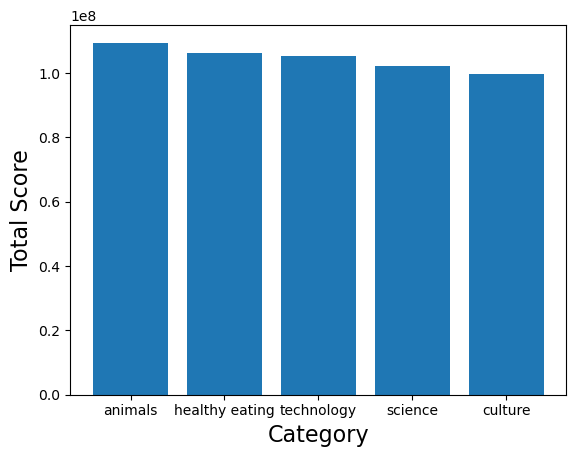

In [55]:
# Plot the values

y = reactions.values
y = y[:5]
x = reactions.index
x = x[:5]
plt.bar(x,y)
plt.ylabel("Total Score",fontsize = 16,color="black")
plt.xlabel("Category",fontsize = 16,color="black")
plt.show() 

In [56]:
# Changing it to a respective date format
reactiontypes['Datetime'] = pd.to_datetime(reactiontypes['Datetime'] ,infer_datetime_format=True)

In [57]:
reactiontypes["Datetime"]

0          2020-11-07
1          2020-11-07
2          2020-11-07
3          2020-11-07
4          2020-11-07
              ...    
37757150   2020-12-17
37757151   2020-12-17
37757152   2020-12-17
37757153   2020-12-17
37757154   2020-12-17
Name: Datetime, Length: 37757155, dtype: datetime64[ns]

In [58]:
reactiontypes["Month"] = reactiontypes["Datetime"].dt.month

In [59]:
reactiontypes["Month"]

0           11
1           11
2           11
3           11
4           11
            ..
37757150    12
37757151    12
37757152    12
37757153    12
37757154    12
Name: Month, Length: 37757155, dtype: int64

In [60]:
data = reactiontypes.copy()

In [61]:
data.isnull().sum()

Unnamed: 0    0
Content ID    0
Type          0
Datetime      0
Category      0
Score         0
Month         0
dtype: int64

In [62]:
data["Count"] = data.groupby('Month')['Month'].transform('count')

In [63]:
data =data.drop_duplicates(subset=["Month"])

In [64]:
data.head()

,Unnamed: 0,Content ID,Type,Datetime,Category,Score,Month,Count
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,Studying,0,11,3127705
1526,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,Studying,0,1,3265886
3052,35,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09,Studying,0,4,3032796
4578,52,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28,healthy eating,0,3,3091762
6104,88,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04,healthy eating,0,8,3247894


In [65]:
data.reset_index()

,index,Unnamed: 0,Content ID,Type,Datetime,Category,Score,Month,Count
0,0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,Studying,0,11,3127705
1,1526,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,Studying,0,1,3265886
2,3052,35,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09,Studying,0,4,3032796
3,4578,52,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28,healthy eating,0,3,3091762
4,6104,88,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04,healthy eating,0,8,3247894
5,10682,166,3f8590c7-6ab2-4973-805a-90cdec355f05,disgust,2021-02-11,dogs,0,2,2941460
6,12208,214,b18cb63f-4c8e-44ee-a47f-541e95191d11,disgust,2021-05-27,public speaking,0,5,3286036
7,18312,296,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-09-11,tennis,0,9,3107363
8,19838,300,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-10-13,tennis,0,10,3155958
9,21364,304,0be59876-d70c-486c-8e0b-a06bef7a2cd6,disgust,2020-07-23,tennis,0,7,3179380


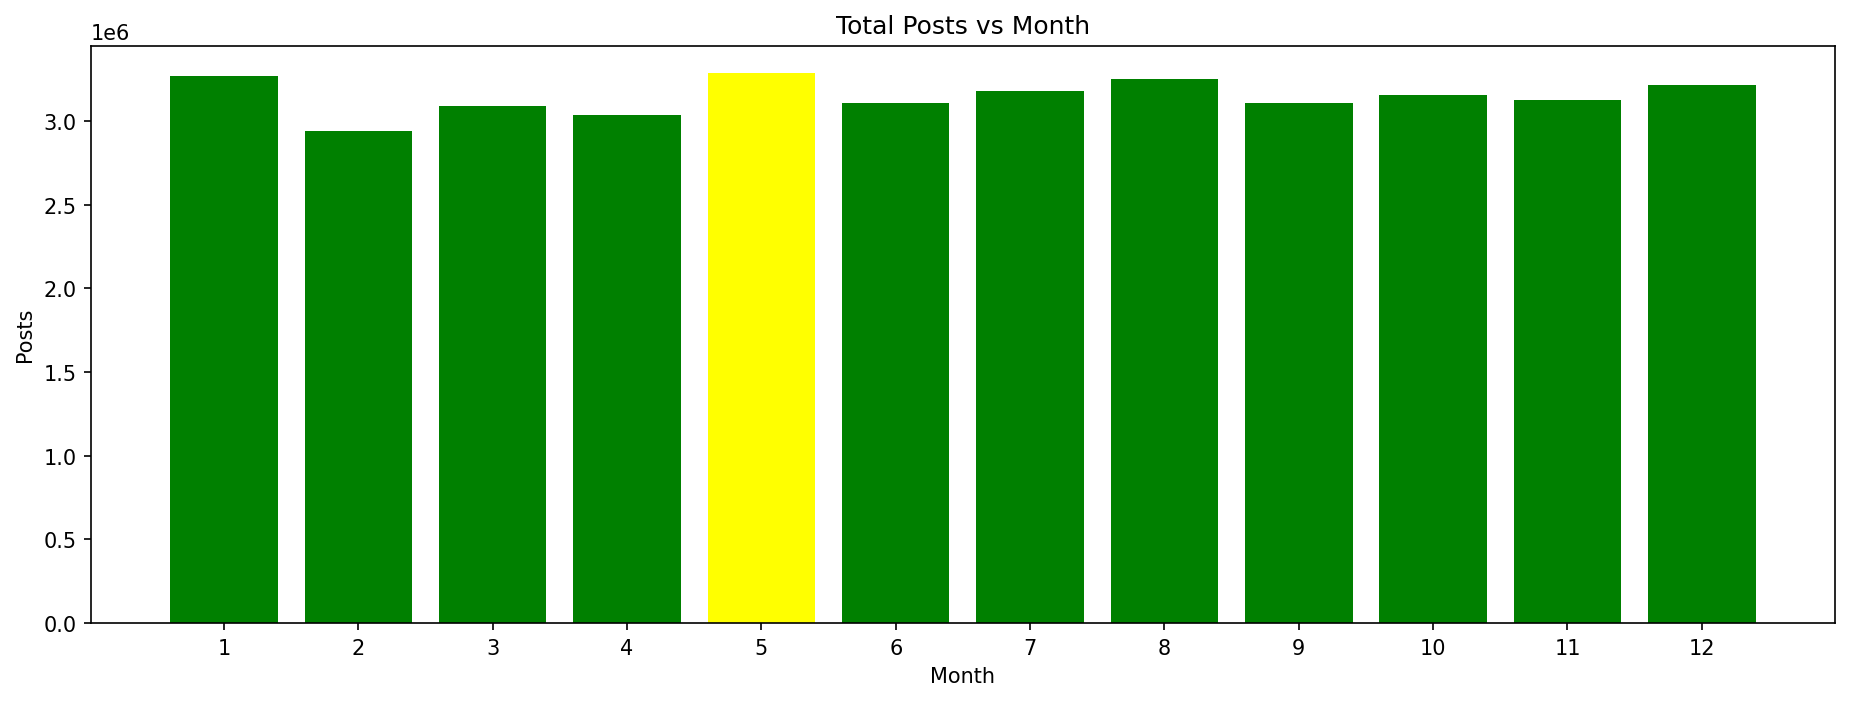

In [67]:
fig = plt.figure(figsize=(15,5), dpi = 150)
ax = plt.subplot()
x = data["Month"]
y = data["Count"]
ax.set_xticks(np.arange(13))
plt.title("Total Posts vs Month")
plt.xlabel("Month")
plt.ylabel("Posts")

plt.bar(x, y,color=colors) 
plt.show()

With respect to the bar plot, the total posts remains higher in the 5th month containing about 2138 post